
# Lecture 1 - Chapter 1.1-1.3

A goal of reaction engineering is to design processes that convert low value feedstocks to high value products using chemical reactions.

1.  Can we do it at an economical rate?
2.  How big should a reactor be to make a product at some rate?
3.  How much heat do we have add/remove to keep the reactor at a safe temperature?
4.  Is it safe to operate a reactor under some conditions?

These are just some of the questions we have to answer, and we have to answer them **quantitatively**. 

To do that we must develop mathematical equations that describe the rate of disappearance of reactants and the rate of production of products. Then we have to solve those equations. We will use mathematical software extensively to solve them.


## Reactions convert reactants to products

We express a reaction like this

 $A + 2B \rightarrow C + D$ 

That means 1 mole of A reacts with two moles of B to produce one mole of C and one mole of D. Reactants are on the left side of the arrow, and products are on the right.

The numbers in front of the species are called stoichiometric coefficients. They do not have to be integers, e.g.  $H_2 + 1/2 O_2 \rightarrow H_2O$ .

Reactions must be balanced, which means that there are the same number of elements on each side. That is required for conservation of mass.


## Reaction rates

The rate of disappearance of A is denoted  $-r_A$ and it has units of mol/(volume \* time).

The rate of production of C is denoted  $r_C$ .

If we have  $-r_A = 4 mol/(L\cdot s)$ then we know that:

 $-r_B = 8 mol/(L\cdot s)$ and  $r_C = 4 mol/(L\cdot s)$ 

or

more generally for this reaction:  $-r_B = -2 r_A$ 


## The rate law is an algebraic function

 $-r_A$ will generally depend on the concentrations of all the species, and the temperature.

It will be an algebraic function. Here are some examples:

 $-r_A = k C_A$ 

 $-r_A = k C_A^{3/2}$ 

 $-r_A = k C_A^2$ 

 $-r_A = k C_A C_B$ 

 $-r_A = \frac{k_1 C_A}{1 + k_2 C_A}$ 

 $r_A$ will always have units like mol / (volume \* time). The concentrations will always have units like mol / vol. The constants in the rate laws will have units appropriate to make these units work.

These will be given for a while.


## The mole balance

The mole balance will be the foundation of reactor design.

![img](./images/control-volume.png)

In - Out + Generation = Accumulation

 $F_{A0} - F_A + G_A = \frac{dN_A}{dt}$ 

 $F_{A0}$ is the molar flow of A in the volume (mol/time)

 $F_A$ is the molar flow of A out of the volume.

 $G_A = V \cdot r_A$ and it is the rate that A is generated **inside** the volume.

 $\frac{dN_A}{dt}$ is the rate of change of the number of moles in the volume.

We will spend several weeks looking at various forms and applications of this equation:

1.  No flows (batch reactor)
2.  Steady state, constant well-mixed, volume (CSTR)
3.  Steady state, plug flow reactor


# The batch reactor

Suppose we have a reaction  $A \rightarrow B$ , where it is known that  $-r_A = k C_A$ , and  $k=0.23 1/min$ . We start the reactor at  $t=0$ with a concentration of  $C_{A0} = 2 mol/L$ . The reactor has a volume of 2 L. What is the concentration of A after 5 minutes?

If there is no flow, the equation simplifies to:

 $\frac{dN_A}{dt} = V \cdot -k C_A$ .

IF the volume is constant, we can simplify this to:

 $\frac{dC_A}{dt} = -k C_A$ .

Which is a simple differential equation with the initial condition of  $C_A(t=0) = 2$ .

The solution is:

 $C_A(t) = C_{A0} exp(-k t)$ .

Let's take a look at this function and plot how  $C_A$ changes with time. This is our first look at Python. 

Several new things to note.

1.  We use "magic" with %matplotlib inline to get the figure to show inline.
2.  We import the plotting and numpy libraries to get access to the functions. You only need to import these once, and often we do it first at the top of the notebook.
3.  We create some variables to store values.
4.  numpy creates arrays, and has array-based functions (i.e. array in, array out with element-wise operations)
5.  We made an array of time values, and then evaluated the concentration expression for each value. Finally, we use some plot commands to make a figure.



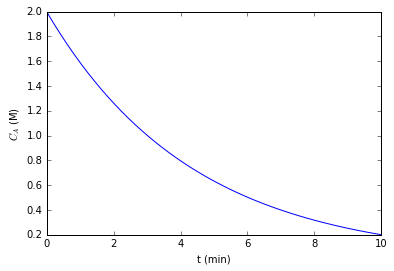

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

k = 0.23  # 1/s
Ca0 = 2  # mol / L

t = np.linspace(0, 10)  # an array of 50 points from 0 to 10
Ca = Ca0 * np.exp(-k * t)  # an array of 50 values of Ca as a function of t

plt.plot(t, Ca)
plt.xlabel('t (min)')
plt.ylabel('$C_A$ (M)')

# To execute this in the IPython notebook, select the cell, and type C-Ret.

In [9]:
Ca0 * np.exp(-k * 10)

0.20051768744560741

It is easy to get help on these commands. Once you have imported the library, use ? to access the help. Also, check out the help menu.



In [1]:
?np.linspace

In [1]:
?np.exp

Back to our figure. You can read from the figure the answer to our original question (what is the concentration at 5 minutes?) is about 0.6 M.

In the next block we solve for it quantitatively. This is a simple evaluation that does not require any algebraic manipulation.



In [11]:
t = 10 # min
'The concentration at 5 min is {} mol/L'.format(Ca0 * np.exp(-k * t))

'The concentration at 5 min is 0.2005176874456074 mol/L'

That is an example of a simple evaluation of math in Python. The output is in single quotes because it is a string. Note the number of significant figures. It is ridiculous. We will fix that next.

A more difficult question is: At what time is the concentration of A 0.5 M? From the graph, you can estimate the answer must be about 6 minutes. We can solve the equation for  $t$ as:

 $t = -\frac{1}{k} ln\frac{C_A}{C_{A0}}$ and evaluate that.



In [1]:
Ca = 0.5
t = -1 / k * np.log(Ca / Ca0)
print('The concentration is {0} M after {1:1.2f} minutes.'.format(Ca, t))

We did a couple of new things there. First, the natural log function is np.log. Second, we used positional format tags in the string. 0 means the first argument (here it is Ca), and 1 means the second argument (which is t) in the format function. Third, we used a format option 1.2f, which means format this argument as a float with two decimal places. We will ignore what the 1 means for now. Finally, we printed the string, which just removes the quotes around it.


# Numerical solutions


## Numerical integration

We won't always be able to get an analytical solution to our equations, and we won't always want to.

1.  The algebra may be very tedious, which means there are lots of opportunities for mistakes.
2.  It may be impossible, or not worth the effort.

So, we need to be able to numerically solve equations. What we solved above was really the integral:

 $t=\int_{C_{A0}}^{C_A} \frac{dC_A}{-k C_A}$ 

To numerically evaluate this, we use the scipy.integrate.quad function, which takes three arguments: an integrand function, and the limits of integration. The integrand here is  $1 / (-k CA)$ .



In [1]:
from scipy.integrate import quad

def integrand(Ca):
    return 1 / (-k * Ca)

ans, err = quad(integrand, Ca0, 0.5)
print('Ca = 0.5 M at t={0:1.2f} min.'.format(ans))

Ca = 0.5 M at t=9.99 min.

The nice thing about this approach is everything is defined, and evaluated. We didn't have to get an analytical form for the integral. We did have to derive the integral equation though.


# Solving nonlinear equations

Alternatively, we can solve the original equation we had.  This equation is nonlinear in  $t$ , so we need to use an iterative solver. The strategy is we define a function that will be equal to zero at the solution we want. For example to solve the equation:

 $0.5 = C_{A0} e^{- k t}$ for t, we need a function that is:

 $f(t) = 0 = 0.5 - C_{A0} e^{- k t}$ 

Then we can use a solver to find the value of  $t$ . These solvers require an initial guess, and then it iteratively finds the answer.



In [1]:
Ca = 0.5
def objective(t):
    return Ca - Ca0 * np.exp(-k * t)

from scipy.optimize import fsolve
ans, = fsolve(objective, 6)
print('The concentration is {0} M after {1:10.2f} minutes.'.format(Ca, ans))

The concentration is 0.5 M after       9.99 minutes.

I used a different format here: 10.2f. That means format the number with two decimal places in a field that is up to 10 characters wide. That is why we see extra space in the output. It doesn't make sense here, but later we will use it to align columns of numbers.

Note we have to make a guess here. This problem is well behaved, there is only one solution and it doesn't matter what you guess.

We get the same answer. Later we will see this is not always true. If there is more than one solution, we get different answers depending on the guess. 

Consider  $y = x^2 - 4$ and ask for what values of x is there a solution? You know it is  $y =\pm 2$ . Let's see what happens when we solve this numerically.



In [1]:
def objective(x):
    return x**2 - 4

In [1]:
print(fsolve(objective, 3))

[ 2.]

In [1]:
print(fsolve(objective, -3))

[-2.]

In [1]:
# You can use more than one initial guess
print(fsolve(objective, [-3, -1, 1, 3]))

[-2. -2.  2.  2.]

In [1]:
print(fsolve(objective, 0))

[ 0.]

WARNING! Here we are notified that we aren't getting a good solution, and you can see the output is just the initial guess. The solver uses derivatives to go towards the solution. What is the derivative of our function at x=0?

Computers do not solve all our problems! But, they can help us solve a lot of them.


# Integrating differential equations

The final approach to this problem is to solve the differential equation numerically. We started with this mole balance:

 $\frac{dC_A}{dt} = - k C_A$ 

with  $C_A(t=0)=C_{A0}$ 

We can use Python to integrate this. To this, we need to write the differential equation in the standard form:

 $y'(x) = f(x, y)$ 

Here we have:

 $y'(t) = -k C_A$ , which is already in standard form, so the function we need is  $f(t) = -k Ca$ 

Then, we need to integrate from the initial condition to some later time. We get the solution evaluated at the time points we specify. So, to find out what the concentration is after five minutes, we integrate to five minutes and take the last value.



In [1]:
# Here is one way to get help on a function
?odeint

In [1]:
def ode(Ca, t):
    'The differential equation dCa/dt = -k * Ca'
    dCadt = -k * Ca
    return dCadt

tspan = np.linspace(0, 5)
sol = odeint(ode, Ca0, tspan)

plt.plot(tspan, sol)
plt.xlabel('t (min)')
plt.ylabel('C_A (M)')

Let's do some sanity checking. 

1.  Does the concentration start at the right place, i.e. Ca0?
2.  What should we expect the solution to look like? Does it look that way?

What is in the variable sol?



In [1]:
sol

#+begin_example
array([[ 1.5       ],
       [ 1.48325738],
       [ 1.46670169],
       [ 1.45033079],
       [ 1.43414259],
       [ 1.41813508],
       [ 1.40230624],
       [ 1.38665408],
       [ 1.37117662],
       [ 1.35587191],
       [ 1.34073804],
       [ 1.32577307],
       [ 1.31097515],
       [ 1.2963424 ],
       [ 1.28187297],
       [ 1.26756505],
       [ 1.25341683],
       [ 1.23942653],
       [ 1.22559239],
       [ 1.21191266],
       [ 1.19838561],
       [ 1.18500956],
       [ 1.17178279],
       [ 1.15870366],
       [ 1.14577052],
       [ 1.13298172],
       [ 1.12033568],
       [ 1.10783079],
       [ 1.09546547],
       [ 1.08323819],
       [ 1.07114738],
       [ 1.05919153],
       [ 1.04736913],
       [ 1.03567869],
       [ 1.02411874],
       [ 1.01268781],
       [ 1.00138447],
       [ 0.99020728],
       [ 0.97915486],
       [ 0.96822579],
       [ 0.95741871],
       [ 0.94673226],
       [ 0.93616508],
       [ 0.92571586],
       [ 0.91538

To get the concentration at the end, we can use indexing. -1 means the last element.



In [1]:
Ca5, = sol[-1]
print('After 5 minutes the concentration is {0:1.2f} M.'.format(Ca5))

After 5 minutes the concentration is 0.87 M.


# Summary thoughts

We used Python to solve a problem several different ways. The problem was easy, and you could use a calculator for it. That was done on purpose, so it would be easy to check our answer is correct, and so we could focus on how to use Python to do that. Later, the problems will be much harder, and it will not be easy or possible to use a calculator.

There is more than one way to solve any problem. Some ways are easier, and less prone to making mistakes. Doing algebra by hand is tedious. When you don't document your work, it is not easy to tell how you got to the equation you solved. In contrast, numerically integrating the ODE above had very few steps, and each one is documented. 

Each method has tradeoffs, and one thing we will spend a lot of time on is understanding the tradeoffs in complexity, coding, ease of verifying the solution, etc&#x2026;


# Review these commands

Run these cells:



In [1]:
?np.linspace

In [1]:
?np.exp

In [1]:
?np.log

In [1]:
?plt.plot

In [1]:
?plt.xlabel

In [1]:
?plt.ylabel

In [1]:
?quad

In [1]:
?fsolve

In [1]:
?odeint